Andhrapradesh Forest Department, 8V4W+M39, Day and Night Junction - Rama Lakshmana Road, Bhadirivanipeta, Srikakulam, Andhra Pradesh, 532001, India
Latitude =  18.3065276 

Longitude =  83.8952228


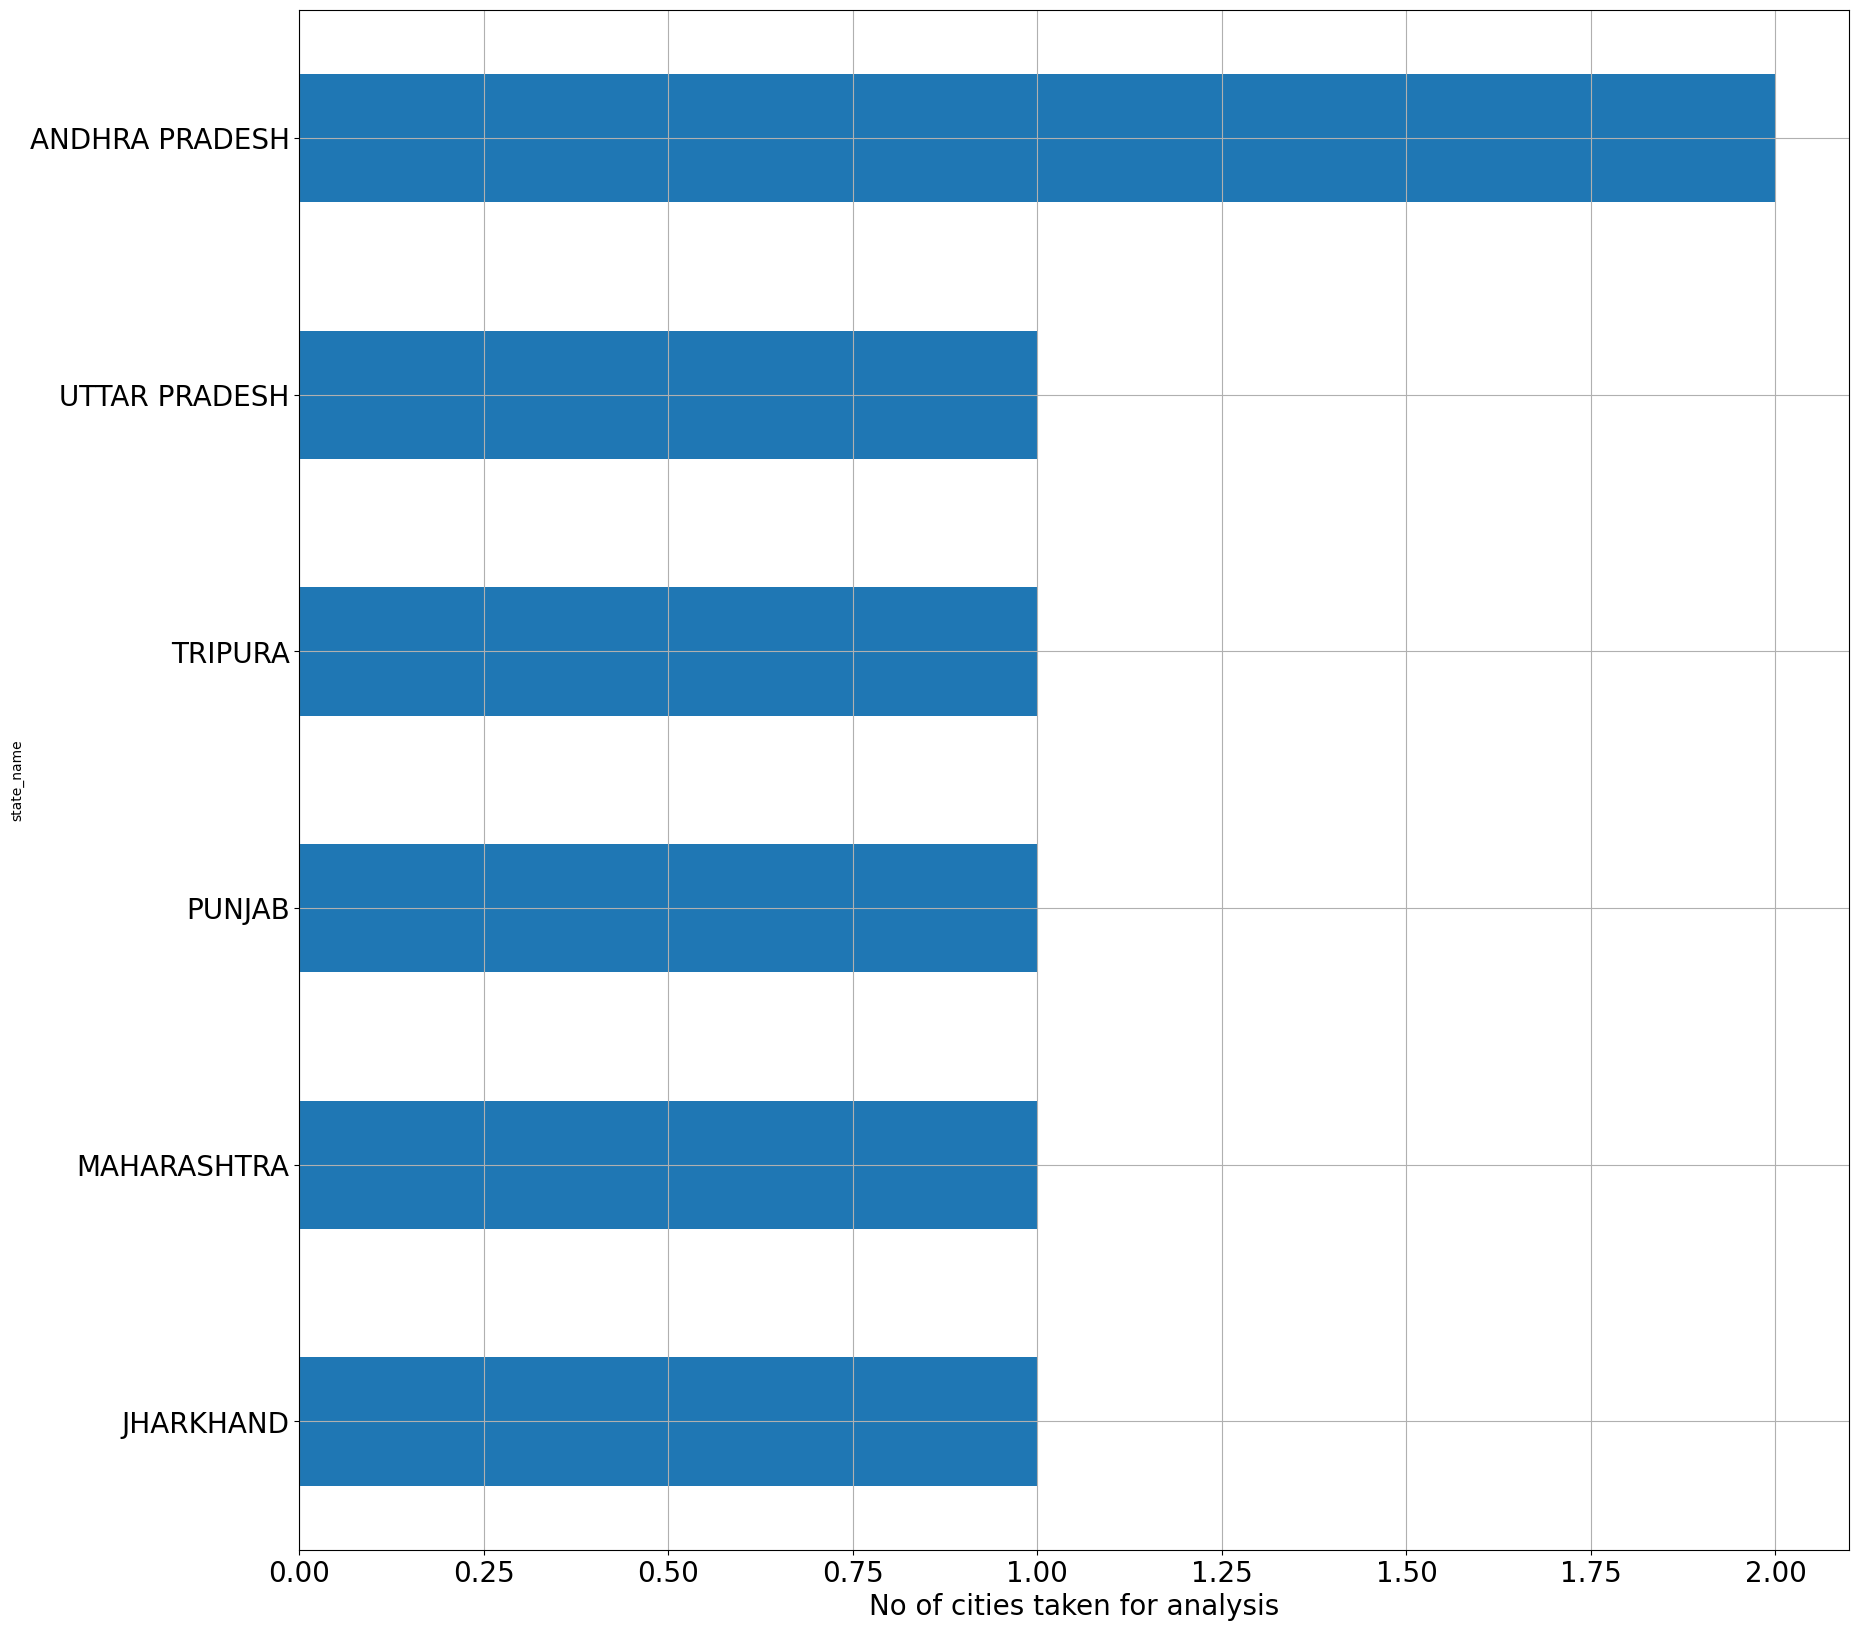

0    30.1452928
1     21.257584
2    19.0809075
3    22.7834741
4    15.6322227
5     23.831457
6    27.1766701
Name: location, dtype: object
0    30.1452928
1     21.257584
2    19.0809075
3    22.7834741
4    15.6322227
5     23.831457
6    27.1766701
Name: latitude, dtype: object
The Top 10 Cities sorted according to the Total Population (Descending Order)


Text(0.5, 1.0, 'Top 10 Populated Cities in India')

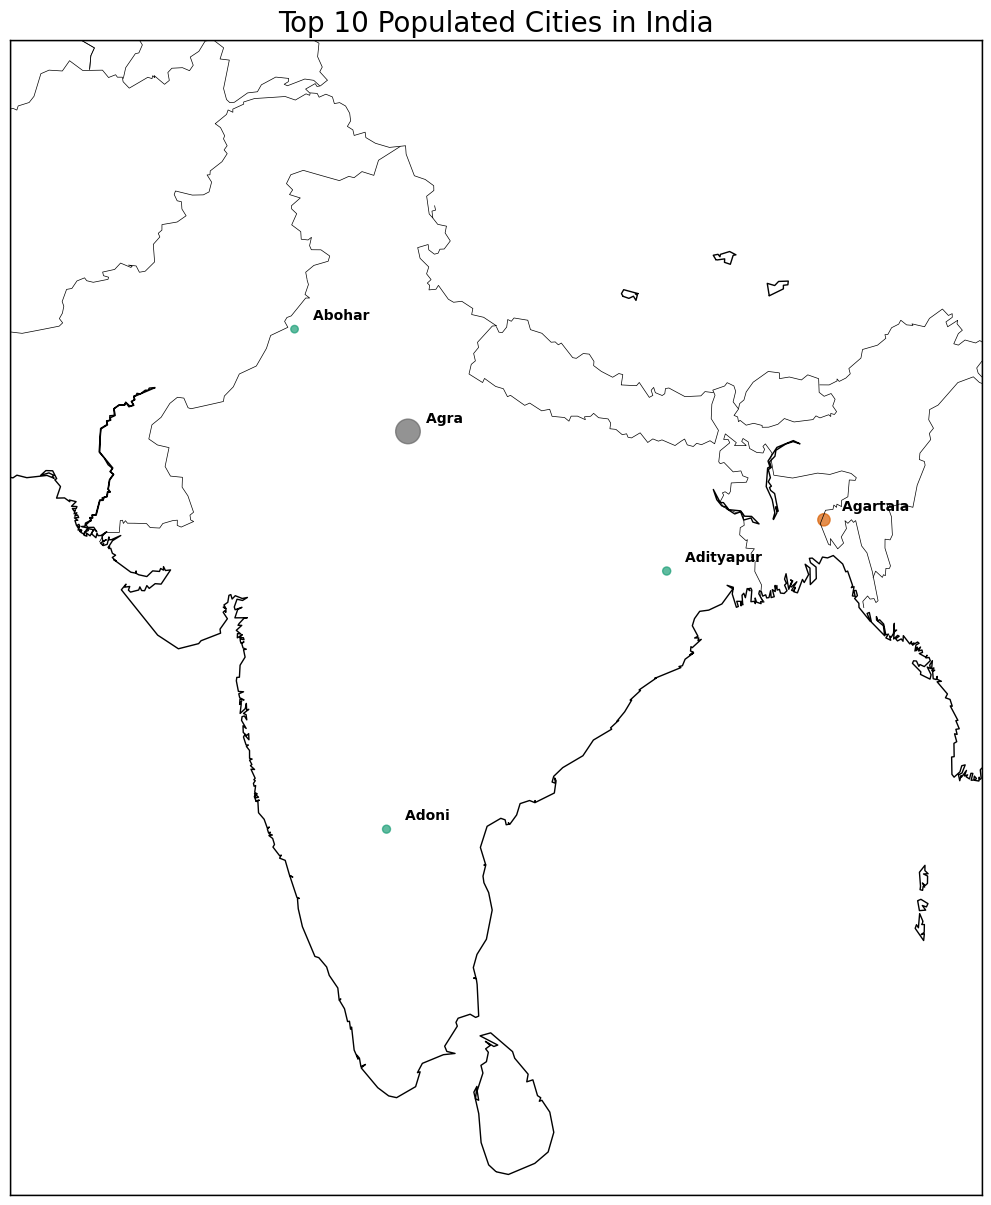

In [2]:
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")
 
# entering the location name
getLoc = loc.geocode("AndhraPradesh Srikakulam")
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)
import pandas as pd
import numpy as np
from numpy import array
import matplotlib as mpl

# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
%matplotlib inline

cities = pd.read_csv (r"C:\Users\hitha\datasets_557_1096_cities_r2.csv.csv")
cities.head()

fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['name_of_city'].count().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)

#plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.grid ()
plt.xlabel('No of cities taken for analysis', fontsize = 20)
plt.show ()


#We have used fig variable to store our design. It has a size of 20×20. Then we have created a variable “states” #to store the value of states in terms of the number of cities and arranged it in ascending order. Plotted it #using “states.plot” with kind “barh” i.e. bar in horizontal. Then we gave label as No of cities for analysis and #finally shown the plot using plt.show().

#Now, we will introduce other columns to the datasets namely, latitude and longitude to get respective terms from #the location column.
#print (cities['location'])
print (cities['location'].apply(lambda x: str(x).split(',')[0]))
#print (cities['location'].apply(lambda x: str(x).split(',')[1]))

cities['latitude'] = cities['location'].apply(lambda x: str(x).split(',')[0])
cities['longitude'] = cities['location'].apply(lambda x: x.split(',')[1])
 
print (cities['latitude'])

#Then, we will get the list of items we are going to show on the map i.e. list of top 10 cities population vise.

print("The Top 10 Cities sorted according to the Total Population (Descending Order)")
top_pop_cities = cities.sort_values(by='population_total',ascending=False)
top10_pop_cities=top_pop_cities.head()
 
plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()
lg=array(top10_pop_cities['longitude'])
lt=array(top10_pop_cities['latitude'])
pt=array(top10_pop_cities['population_total'])
nc=array(top10_pop_cities['name_of_city'])
x, y = map(lg, lt)
population_sizes = top10_pop_cities["population_total"].apply(lambda x: int(x / 5000))
plt.scatter(x, y, s=population_sizes, marker="o", c=population_sizes, cmap=cm.Dark2, alpha=0.7)
for ncs, xpt, ypt in zip(nc, x, y):
    plt.text(xpt+60000, ypt+30000, ncs, fontsize=10, fontweight='bold')
plt.title('Top 10 Populated Cities in India',fontsize=20)
 
